In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat

mat.rcParams.update({'font.size': 22})
N=6

###CHANGE META INFORMATION###
#direction A/B
dir = "A"
#ports src/dst
ports = "src"
#ipversion 4/6
ipver = 4
#############################

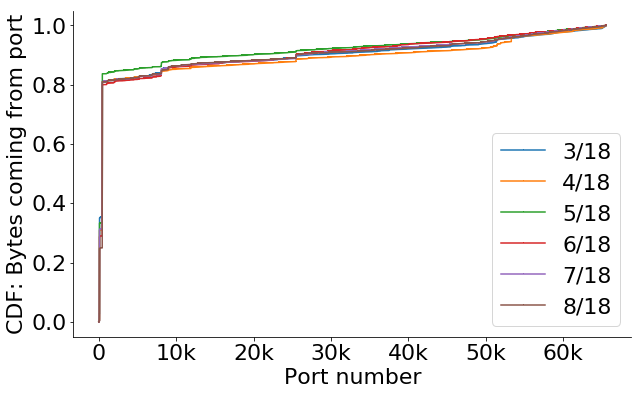

In [2]:
mat.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,6))
x = range(1,65536)
data = {}
for i in range(3,N+3):
    df = pd.read_table(f'../data/{ports}_port_ip_silk_0{i}_{dir}.csv', sep='|')
    df = df.sort_values(by=['port'])
    df = df[df['ip version'] == ipver]
    df = df.drop(columns=['ip version'])
    df = df[df['port'] > 0]
    df_ports = df['port'].tolist()
    df = df['bytes'].tolist()
    counter = 0
    for num in range (1,65536):
        try:
            if df_ports[counter]!=num:
                df.insert(counter, 0)
                df_ports.insert(counter, num)
        except:
            df.append(0)
        counter += 1
    data[i] = df

for idx,entry in data.items():
    total = 0.0
    for index,element in enumerate(entry):
        entry[index]=float(entry[index])
        entry[index]/=(1024.0*1024.0)
        total+=entry[index]
    for index,element in enumerate(entry):
        if(index>0):
            entry[index] += entry[index-1]
    for index,element in enumerate(entry):
        entry[index] /= total
    plt.plot(x,entry,marker=',',linestyle='-')

names = []
for i in range(3,N+3):
    names.append(str(i)+'/18')
leg = plt.legend(names)
for i in range(0,N):
    leg.legendHandles[i]._legmarker.set_markersize(10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("Port number")
plt.xticks(np.arange(0,65536, step=10000), ('0','10k','20k','30k','40k','50k','60k'))
if ports == "dst":
    plt.ylabel("CDF: Bytes arriving at port")
else:
    plt.ylabel("CDF: Bytes coming from port")
plt.show()